# **Análise de Métodos de Pagamento no Brasil**

## **1. Carregando o Dataset**
<span style="color: #B76E79;">Carregue o dataset **"brazilian_payment_methods.csv"** usando o Pandas e exiba as primeiras 5 linhas.</span>

---

## **2. Processamento Inicial**
### **2.1. Troca dos Nomes das Colunas para Português**
<span style="color: #B76E79;">Renomeie as colunas do dataset conforme as traduções fornecidas.</span>

### **2.2. Seleção de Colunas**
<span style="color: #B76E79;">Selecione apenas as colunas **YearMonth, quantityPix e valuePix** e exiba as primeiras 10 linhas.</span>


### **2.3. Filtragem de Dados**
<span style="color: #B76E79;">Filtre o dataset para exibir apenas as linhas onde o valor total das transações **PIX (valuePix) foi maior que 1.000.000**.</span>


### **2.4. Criação de Nova Coluna**
<span style="color: #B76E79;">Crie uma nova coluna chamada **averagePixValue** que contenha o valor médio por transação PIX (*valuePix / quantityPix*).</span>

---

## **3. Análise Exploratória de Dados**
### **3.1. Agrupamento de Dados (Groupby)**
<span style="color: #B76E79;">Agrupe os dados por ano (**extraído da coluna YearMonth**) e calcule a soma total do valor das transações PIX (**valuePix**) para cada ano.</span>

### **3.2. Comparação entre PIX e Boleto**
<span style="color: #B76E79;">Compare o valor total das transações PIX (valuePix) com o valor total das transações de boleto (valueBrazilianBoletoPayment) ao longo do tempo. Em qual mês/ano o PIX ultrapassou o boleto em valor total?.</span>

### **3.3. Tendência de Declínio do DOC**
<span style="color: #B76E79;">Analise a tendência de declínio do valor total das transações DOC (valueDOC) ao longo do tempo. Em qual mês/ano o DOC começou a perder participação significativamente?.</span>

### **3.4. Média e Mediana**
<span style="color: #B76E79;">Calcule a **média** e a **mediana** do valor total das transações TED (**valueTED**).</span>

### **3.5. Agrupamento e Agregação**
<span style="color: #B76E79;">Agrupe os dados por ano e calcule a **média do valor das transações de boleto** (**valueBrazilianBoletoPayment**) para cada ano.</span>

---

## **4. Visualização e Interpretação dos Dados**
### **4.1. Gráfico de Linha para Evolução do PIX**
<span style="color: #B76E79;">Crie um **gráfico de linha** para mostrar a evolução do valor total das transações **PIX (valuePix)** ao longo do tempo (**usando a coluna YearMonth como eixo X**).</span>

### **4.2. Substituição de Valores**
<span style="color: #B76E79;">Substitua os valores **0** na coluna **quantityDOC** por **NaN** (valores nulos).</span>

### **4.3. Correlação entre Métodos de Pagamento**
<span style="color: #B76E79;">Calcule a **correlação** entre o valor total das transações **PIX (valuePix)** e **TED (valueTED)**.
O que você pode inferir sobre a relação entre esses dois métodos de pagamento?</span>

### **4.4. Comparação de Crescimento entre PIX e TED**
<span style="color: #B76E79;">Compare o **crescimento percentual** do valor total das transações **PIX (valuePix)** e **TED (valueTED)** ao longo do tempo.</span>

### **4.5. Participação de Cada Método de Pagamento**
<span style="color: #B76E79;">Calcule a **participação percentual** de cada método de pagamento (**PIX, TED, TEC, Boleto, DOC**) no valor total das transações para o **último mês disponível no dataset**.</span>


**<span style="color:rgb(163, 174, 17);">Importação da *libs* para o desenvolvimento do projeto**</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**<span style="color:rgb(163, 174, 17);">O *read_csv* vai ler o dataset no diretório local da maquina, tranformar em um Datafrema do Pandas e mostrar os dados no formato tabular!**</span>

In [2]:
df = pd.read_csv(r"C:\Users\uniao\OneDrive\Área de Trabalho\Cursos 2024\Soulcode\Projeto_Metodo_Pagamento\datasets\brazilian_payment_methods - brazilian_payment_methods.csv")

df.head(5)

,YearMonth,quantityPix,valuePix,quantityTED,valueTED,quantityTEC,valueTEC,quantityBankCheck,valueBankCheck,quantityBrazilianBoletoPayment,valueBrazilianBoletoPayment,quantityDOC,valueDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58


**<span style="color:rgb(163, 174, 17);">Criar uma cópia como backup é uma boa prática para preservar os dados originais**</span>

In [3]:
df_backup = df.copy()

**<span style="color:rgb(163, 174, 17);">Transfomação nos nomes das colunas  é uma prática essencial para melhorar a legibilidade, padronização e usabilidade dos dados.**</span>

In [9]:
df_backup = df.rename(columns={
    "YearMonth": "MesReferencia",
    "quantityPix": "NumeroTransacoesPIX",
    "valuePix": "ValorTotalPIX",
    "quantityTED": "NumeroTransacoesTED",
    "valueTED": "ValorTotalTED",
    "quantityTEC": "NumeroTransacoesTEC",
    "valueTEC": "ValorTotalTEC",
    "quantityBankCheck": "NumeroTransacoesCheque",
    "valueBankCheck": "ValorTotalCheque",
    "quantityBrazilianBoletoPayment": "NumeroTransacoesBoleto",
    "valueBrazilianBoletoPayment": "ValorTotalBoleto",
    "quantityDOC": "NumeroTransacoesDOC",
    "valueDOC": "ValorTotalDOC",
    # interessante trazer -> "NumeroTransacoesCartaoCredito",
    # interessante trazer -> "ValorTotalCartaoCredito",
})

df_backup.head(5)

,MesReferencia,NumeroTransacoesPIX,ValorTotalPIX,NumeroTransacoesTED,ValorTotalTED,NumeroTransacoesTEC,ValorTotalTEC,NumeroTransacoesCheque,ValorTotalCheque,NumeroTransacoesBoleto,ValorTotalBoleto,NumeroTransacoesDOC,ValorTotalDOC
0,202405,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,202404,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,202403,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
3,202402,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
4,202401,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58


**<span style="color:rgb(163, 174, 17);">Precisamos converter a coluna *MesReferencia* para o formato datetime**</span>

In [10]:
df_backup['MesReferencia'] = pd.to_datetime(df_backup['MesReferencia'], format='%Y%m')

**<span style="color:rgb(163, 174, 17);">1. Iremos criar duas colunas extraindo informações do ano e do mês (*dt.year, dt.month*) a partir da coluna MesReferenciaos.<br>2. Reordenamos colocando 'Ano' e 'Mes' no início. 3.precisa remover a coluna MesReferencia depois de criar 'Ano' e 'Mes'**</span>

In [11]:
df_backup['Ano'] = pd.to_datetime( df_backup['MesReferencia']).dt.year
df_backup['Mes'] = pd.to_datetime(df_backup['MesReferencia']).dt.month

df_backup = df_backup[['Ano', 'Mes'] + list(df_backup.columns[:-2])].drop('MesReferencia', axis=1)

In [ ]:
correlacao = df_backup.corr()
correlacao 

**<span style="color:rgb(163, 174, 17);">1. Iremos selecionar as colunas YearMonth, quantityPix, valuePix e exiba as primeiras 10 linhas'**</span>

In [15]:
df_backup[['Ano', 'NumeroTransacoesPIX', 'ValorTotalPIX']].head(10)

,Ano,NumeroTransacoesPIX,ValorTotalPIX
0,2024,5228826.97,2137205.79
1,2024,4924681.00,2083746.68
2,2024,4903392.34,1936188.21
3,2024,4367133.78,1718217.65
4,2024,4371541.99,1818473.97
5,2023,4804459.10,1933836.67
6,2023,4231283.46,1740874.02
7,2023,4069683.33,1666062.39
8,2023,3846749.03,1539042.27
9,2023,3767327.85,1529362.91


**<span style="color:rgb(163, 174, 17);">filtrar o dataset para exibir apenas as linhas onde valuePix seja maior que 1.000.000**</span>

In [20]:
df_filtrado = df_backup[df_backup['ValorTotalPIX'] > 1000000] 
df_filtrado[['Ano', 'NumeroTransacoesPIX', 'ValorTotalPIX']]

,Ano,NumeroTransacoesPIX,ValorTotalPIX
0,2024,5228826.97,2137205.79
1,2024,4924681.00,2083746.68
2,2024,4903392.34,1936188.21
3,2024,4367133.78,1718217.65
4,2024,4371541.99,1818473.97
5,2023,4804459.10,1933836.67
6,2023,4231283.46,1740874.02
7,2023,4069683.33,1666062.39
8,2023,3846749.03,1539042.27
9,2023,3767327.85,1529362.91


**<span style="color:rgb(163, 174, 17);">Criação de uma nova coluna chamada averagePixValue que contenha o valor médio por transação PIX.**</span>

In [120]:
df_backup["valorMedioPix"] = (df_backup["ValorTotalPIX"] / df_backup["NumeroTransacoesPIX"]).fillna(0)
df_backup

,Ano,Mes,NumeroTransacoesPIX,ValorTotalPIX,NumeroTransacoesTED,ValorTotalTED,NumeroTransacoesTEC,ValorTotalTEC,NumeroTransacoesCheque,ValorTotalCheque,NumeroTransacoesBoleto,ValorTotalBoleto,NumeroTransacoesDOC,ValorTotalDOC,valorMedioPix
0,2024,5,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00,0.41
1,2024,4,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00,0.42
2,2024,3,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00,0.39
3,2024,2,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21,0.39
4,2024,1,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,5,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78,0.00
97,2016,4,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65,0.00
98,2016,3,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86,0.00
99,2016,2,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74,0.00


**<span style="color:rgb(163, 174, 17);">Aplicando um agrupamento mostrando o total de transações PIX por ano.**</span>

In [22]:
pix_ano = df_backup.groupby('Ano')['ValorTotalPIX'].sum().reset_index()
pix_ano

,Ano,ValorTotalPIX
0,2016,0.00
1,2017,0.00
2,2018,0.00
3,2019,0.00
4,2020,149894.91
5,2021,5204116.61
6,2022,10890971.89
7,2023,17179392.92
8,2024,9693832.30


**<span style="color:rgb(163, 174, 17);">Analisando todas as colunas que contém pelo menos uma linha com valor 0.**</span>

In [121]:
df_backup.loc[(df_backup == 0).any(axis=1)]

,Ano,Mes,NumeroTransacoesPIX,ValorTotalPIX,NumeroTransacoesTED,ValorTotalTED,NumeroTransacoesTEC,ValorTotalTEC,NumeroTransacoesCheque,ValorTotalCheque,NumeroTransacoesBoleto,ValorTotalBoleto,NumeroTransacoesDOC,ValorTotalDOC,valorMedioPix
0,2024,5,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00,0.41
1,2024,4,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00,0.42
2,2024,3,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00,0.39
43,2020,10,0.00,0.00,193914.69,2529825.54,755.53,1585.81,21888.85,53427.37,336428.41,363359.84,19496.70,13355.08,0.00
44,2020,9,0.00,0.00,187549.69,2538287.06,697.58,1445.03,21590.82,53174.54,330602.01,350762.59,23097.50,16065.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,5,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78,0.00
97,2016,4,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65,0.00
98,2016,3,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86,0.00
99,2016,2,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74,0.00


**<span style="color:rgb(163, 174, 17);">Ordenando o dataset pela coluna valuePix em ordem decrescente e exibindo as 10 transações com os maiores valores.**</span>

In [23]:
filtro_valorPix_Ordenado = df_backup.sort_values('ValorTotalPIX', ascending=False)
filtro_valorPix_Ordenado.head(10)

,Ano,Mes,NumeroTransacoesPIX,ValorTotalPIX,NumeroTransacoesTED,ValorTotalTED,NumeroTransacoesTEC,ValorTotalTEC,NumeroTransacoesCheque,ValorTotalCheque,NumeroTransacoesBoleto,ValorTotalBoleto,NumeroTransacoesDOC,ValorTotalDOC
0,2024,5,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00
1,2024,4,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00
2,2024,3,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00
5,2023,12,4804459.10,1933836.67,80202.26,3629758.88,1152.37,2498.31,11241.91,39208.22,337552.05,484391.91,1412.03,1399.42
4,2024,1,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58
6,2023,11,4231283.46,1740874.02,74398.37,3135994.81,754.56,1711.45,11866.27,40735.16,345234.36,490503.75,1506.38,1521.77
3,2024,2,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21
7,2023,10,4069683.33,1666062.39,71870.52,3325168.12,664.92,1578.12,12902.42,46646.90,362721.59,512336.66,1746.38,1763.79
8,2023,9,3846749.03,1539042.27,69407.76,3190049.86,483.31,1085.19,11916.38,41653.43,340115.13,471176.87,2636.88,2532.14
9,2023,8,3767327.85,1529362.91,76572.58,3406864.68,614.09,1481.22,13113.98,46973.84,360865.30,501254.74,5253.95,3197.77


**<span style="color:rgb(163, 174, 17);">Contagem de quantos meses no dataset tiveram mais de 1.000.000 de transações PIX.**</span>

In [ ]:
grup_contagem= df_backup[df_backup['NumeroTransacoesPIX'] > 1000000]
len(grup_contagem)

33

**<span style="color:rgb(163, 174, 17);">Calculo da média e a mediana do valor total das transações TED.**</span>

In [34]:
media = df_backup['ValorTotalTED'].mean()
mediana = df_backup['ValorTotalTED'].median()
print(f'Média: {media} \nMediana: {mediana}')

Média: 2341739.6480198014 
Mediana: 2217642.2


**<span style="color:rgb(163, 174, 17);">Calculo da média e a mediana do valor total das transações TED por Ano.**</span>

In [35]:
grup_medio = df_backup.groupby('Ano')['ValorTotalBoleto'].mean()
grup_mediana = df_backup.groupby('Ano')['ValorTotalBoleto'].median()
grup_medio, grup_mediana

(Ano
 2016    235498.225000
 2017    242441.344167
 2018    260569.645000
 2019    292543.355833
 2020    319431.905833
 2021    400709.792500
 2022    458345.465833
 2023    480105.020833
 2024    495947.710000
 Name: ValorTotalBoleto, dtype: float64,
 Ano
 2016    236793.960
 2017    247488.840
 2018    264070.725
 2019    294017.005
 2020    314488.685
 2021    402011.670
 2022    474632.100
 2023    481925.715
 2024    506302.820
 Name: ValorTotalBoleto, dtype: float64)

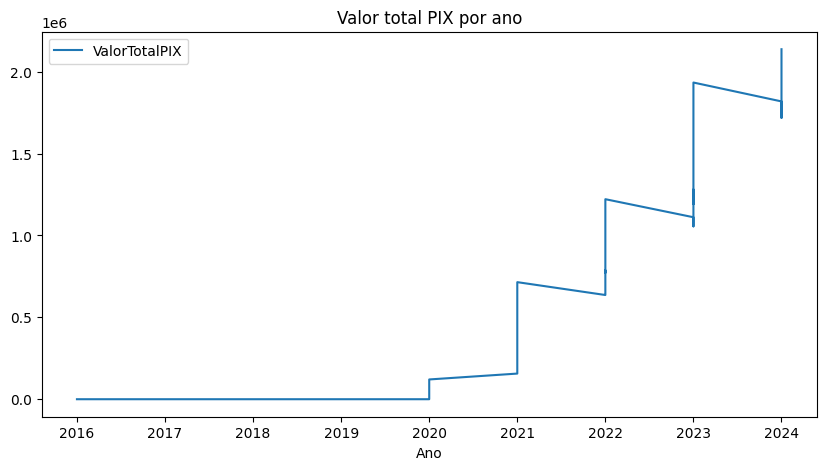

In [41]:
df_backup.plot(x='Ano', y='ValorTotalPIX', kind='line', figsize=(10,5))
plt.title('Valor total PIX por ano')
plt.show()

In [43]:
df_backup['Quantidade DOC'] = df_backup['NumeroTransacoesDOC'].replace(0.0, np.nan)
df_backup

,Ano,Mes,NumeroTransacoesPIX,ValorTotalPIX,NumeroTransacoesTED,ValorTotalTED,NumeroTransacoesTEC,ValorTotalTEC,NumeroTransacoesCheque,ValorTotalCheque,NumeroTransacoesBoleto,ValorTotalBoleto,NumeroTransacoesDOC,ValorTotalDOC,Quantidade DOC
0,2024,5,5228826.97,2137205.79,69023.11,3482036.97,0.00,0.00,10467.85,40133.55,349180.92,506302.82,0.00,0.00,NaN
1,2024,4,4924681.00,2083746.68,70647.15,3652606.48,0.00,0.00,11179.22,43295.40,361633.28,524619.69,0.00,0.00,NaN
2,2024,3,4903392.34,1936188.21,67565.05,3333054.27,0.00,0.00,10122.46,36644.55,336435.46,469047.59,0.00,0.00,NaN
3,2024,2,4367133.78,1718217.65,65805.87,2981226.45,60.01,109.32,10373.38,37076.26,332269.47,463066.01,61.89,34.21,61.89
4,2024,1,4371541.99,1818473.97,70343.25,3337344.85,387.18,815.94,11919.12,41615.89,363550.32,516702.44,600.76,616.58,600.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2016,5,0.00,0.00,38397.79,1284857.76,658.08,1242.92,49391.10,85525.27,210245.33,243361.74,15222.38,12172.78,15222.38
97,2016,4,0.00,0.00,36144.63,1284108.75,586.71,1029.40,45938.34,79444.79,195789.71,226725.92,14376.42,11632.65,14376.42
98,2016,3,0.00,0.00,37762.98,1387738.67,666.89,1250.64,50443.05,85203.32,207938.76,239690.04,15322.97,12303.86,15322.97
99,2016,2,0.00,0.00,33986.29,1184928.57,576.42,1079.27,46957.82,79927.23,197575.71,225107.82,14455.60,11778.74,14455.60


In [44]:
cor= df_backup['ValorTotalPIX'].corr(df_backup['ValorTotalTED'])
cor

0.8132581546380627

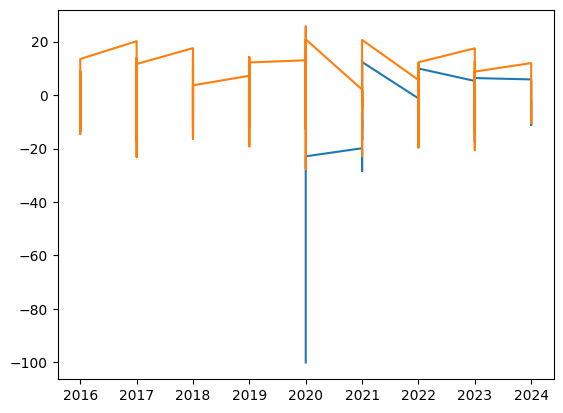

In [37]:
df_backup['porcentualMudancaPix'] = df_backup['ValorTotalPIX'].pct_change()*100
df_backup['porcentualMudancaTED'] = df_backup['ValorTotalTED'].pct_change()*100

plt.plot(df_backup['Ano'], df_backup['porcentualMudancaPix'], label='Mudança PIX')
plt.plot(df_backup['Ano'], df_backup['porcentualMudancaTED'], label='Mudança TED')
plt.show()

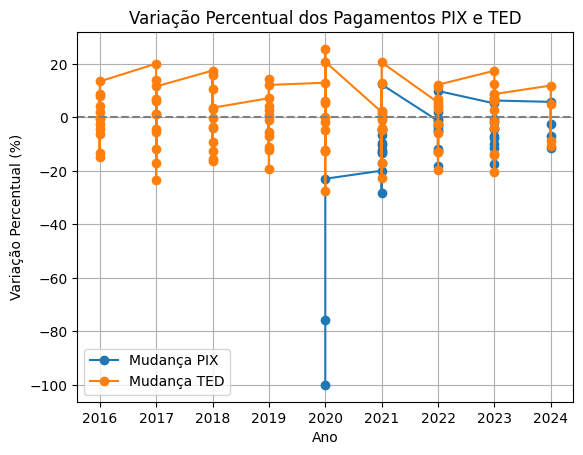

In [38]:
plt.plot(df_backup['Ano'], df_backup['porcentualMudancaPix'], marker='o', label='Mudança PIX')
plt.plot(df_backup['Ano'], df_backup['porcentualMudancaTED'], marker='o', label='Mudança TED')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Ano')
plt.ylabel('Variação Percentual (%)')
plt.legend()
plt.title('Variação Percentual dos Pagamentos PIX e TED')
plt.grid(True)

In [39]:
df_backup.to_csv("dadosPagamentoTratados.csv", index=False, encoding="utf-8")